**Bagging & Boosting KNN & Stacking Assignment**

Q1.: What is the fundamental idea behind ensemble techniques? How does
bagging differ from boosting in terms of approach and objective?


Ans:- Fundamental Idea: Ensemble techniques combine multiple models to improve overall performance, reduce variance, and enhance generalization.
- Bagging (Bootstrap Aggregating):
- Trains models independently on random subsets of data.
- Reduces variance and helps prevent overfitting.
- Example: Random Forest.
- Boosting:
- Trains models sequentially, each correcting errors of the previous.
- Reduces bias and builds strong learners from weak ones.
- Example: AdaBoost, Gradient Boosting.



Q2.Explain how the Random Forest Classifier reduces overfitting compared to
a single decision tree. Mention the role of two key hyperparameters in this process.

Ans:- Random Forest reduces overfitting by averaging predictions from multiple decision trees trained on bootstrapped samples.
- Key Hyperparameters:
- n_estimators: Number of trees; more trees reduce variance.
- max_features: Limits features per split; promotes diversity among trees.



Q3. What is Stacking in ensemble learning? How does it differ from traditional
bagging/boosting methods? Provide a simple example use case.

Ans:
- Stacking: Combines predictions from multiple models using a meta-model.
- Difference: Unlike bagging/boosting, stacking uses a second-level learner to blend base model outputs.
- Example of Use Case: Combining logistic regression, decision trees, and SVMs for credit scoring.


Q4.What is the OOB Score in Random Forest, and why is it useful? How does
it help in model evaluation without a separate validation set?


Ans:OOB (Out-of-Bag) Score: Uses unused samples from bootstrapping to evaluate model performance.
Benefit: Acts as a built-in cross-validation, saving time and avoiding the need for a separate validation set.



Q5. Compare AdaBoost and Gradient Boosting in terms of:
● How they handle errors from weak learners
● Weight adjustment mechanism
● Typical use cases

Ans: AdaBoost
- AdaBoost focuses on misclassified samples: it increases the weight of instances that were incorrectly predicted by the previous weak learners.
- Instance weights are updated after each weak learner based on classification accuracy.
- Misclassified samples get higher weights; correctly classified samples get lower weights.

-Works well when noise is low and the data is clean.
- Commonly used in basic ensemble setups and for interpretable small models.


Gardient Boosting:
Gradient Boosting focuses on errors in prediction values: each new learner is trained to predict the residuals (negative gradients) of the loss function from the previous model.
- It directly minimizes the overall loss function (e.g., MSE, log loss) rather than reweighting samples.

- Does not explicitly adjust sample weights.
- Instead, it fits the next weak learner to the residuals (gradients)
- More flexible and powerful; works for regression, classification, and ranking.
- Basis for many advanced models like XGBoost, LightGBM, and CatBoost.
- Preferred for large, complex datasets and high-performance machine learning competitions.




Q6.:Why does CatBoost perform well on categorical features without requiring
extensive preprocessing? Briefly explain its handling of categorical variables.

Ans:- CatBoost handles categorical variables using ordered target statistics and permutation-driven encoding, reducing overfitting.
- No need for one-hot encoding or label encoding, making it efficient and accurate




In [1]:
Q7: KNN Classifier Assignment: Wine Dataset Analysis with
Optimization
Task:
1. Load the Wine dataset (sklearn.datasets.load_wine()).
2. Split data into 70% train and 30% test.
3. Train a KNN classifier (default K=5) without scaling and evaluate using:
a. Accuracy
b. Precision, Recall, F1-Score (print classification report)
4. Apply StandardScaler, retrain KNN, and compare metrics.
5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric
(Euclidean, Manhattan)


# Step 1: Import libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Step 2: Load dataset
wine = load_wine()
X, y = wine.data, wine.target

# Step 3: Split data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Step 4: Train KNN (K=5) without scaling
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("=== KNN without Scaling ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 5: Apply StandardScaler and retrain KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

print("\n=== KNN with StandardScaler ===")
print("Accuracy:", accuracy_score(y_test, y_pred_scaled))
print("Classification Report:\n", classification_report(y_test, y_pred_scaled))

# Step 6: GridSearchCV to find best K and distance metric
param_grid = {
    'n_neighbors': range(1, 21),
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)

print("\n=== Grid Search Results ===")
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate best model on test data
best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(X_test_scaled)

print("\n=== Best KNN Model on Test Set ===")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))


=== KNN without Scaling ===
Accuracy: 0.7222222222222222
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.78      0.67      0.72        21
           2       0.50      0.60      0.55        15

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.74      0.72      0.73        54


=== KNN with StandardScaler ===
Accuracy: 0.9444444444444444
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.86      0.92        21
           2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54


=== Grid Search Results ===
Best Parameters: {'metric': 'euclidean', '

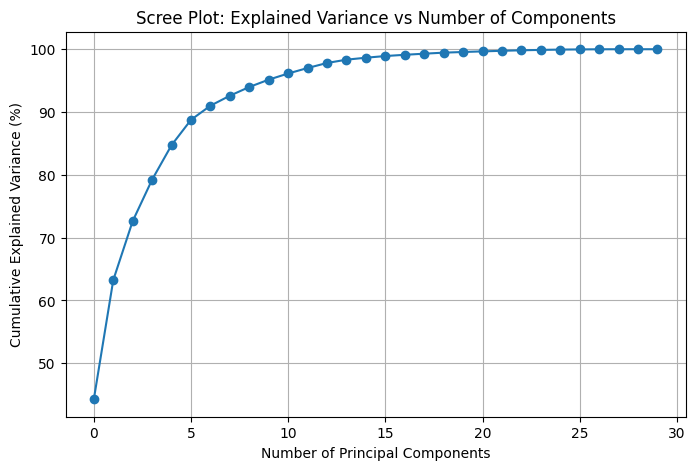


Number of components to retain 95% variance: 10

=== KNN Accuracy Comparison ===
Original Data Accuracy: 0.9708
PCA (95% Variance) Data Accuracy: 0.9474


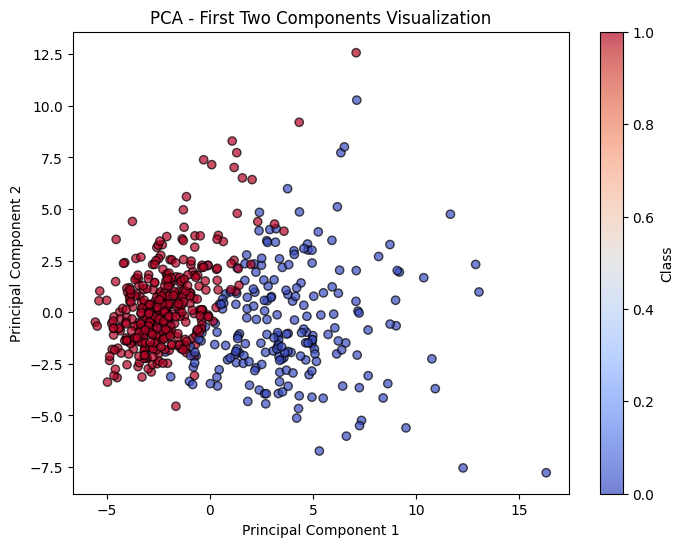

In [6]:
##Q8.Question 8 : PCA + KNN with Variance Analysis and Visualization
"""
Task:
1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()).
2. Apply PCA and plot the scree plot (explained variance ratio).
3. Retain 95% variance and transform the dataset.
4. Train KNN on the original data and PCA-transformed data, then compare
accuracy.
5. Visualize the first two principal components using a scatter plot (color by
"""


# PCA + KNN with Variance Analysis and Visualization
# ==================================================

# Step 1: Import required libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Step 2: Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

# Step 3: Standardize the data (important before PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Step 5: Plot Scree Plot (Explained Variance Ratio)
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_) * 100, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Scree Plot: Explained Variance vs Number of Components')
plt.grid(True)
plt.show()

# Step 6: Retain 95% variance and transform dataset
pca_95 = PCA(n_components=0.95)
X_pca_95 = pca_95.fit_transform(X_scaled)
print(f"\nNumber of components to retain 95% variance: {pca_95.n_components_}")

# Step 7: Split data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)
X_train_pca, X_test_pca = train_test_split(X_pca_95, test_size=0.3, random_state=42, stratify=y)

# Step 8: Train KNN on original data
knn_original = KNeighborsClassifier(n_neighbors=5)
knn_original.fit(X_train, y_train)
y_pred_orig = knn_original.predict(X_test)
acc_orig = accuracy_score(y_test, y_pred_orig)

# Step 9: Train KNN on PCA-transformed data
# (Using the same number of components that preserve 95% variance)
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)

# Step 10: Compare accuracies
print("\n=== KNN Accuracy Comparison ===")
print(f"Original Data Accuracy: {acc_orig:.4f}")
print(f"PCA (95% Variance) Data Accuracy: {acc_pca:.4f}")

# Step 11: Visualization of first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=y, cmap='coolwarm', edgecolor='k', alpha=0.7
)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - First Two Components Visualization')
plt.colorbar(label='Class')
plt.show()

Question 9:KNN Regressor with Distance Metrics and K-Value
Analysis
Task:
1. Generate a synthetic regression dataset
(sklearn.datasets.make_regression(n_samples=500, n_features=10)).
2. Train a KNN regressor with:
a. Euclidean distance (K=5)
b. Manhattan distance (K=5)
c. Compare Mean Squared Error (MSE) for both.
3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff.


=== KNN Regressor Comparison (K=5) ===
Euclidean Distance MSE: 4960.8962
Manhattan Distance MSE: 5318.9501


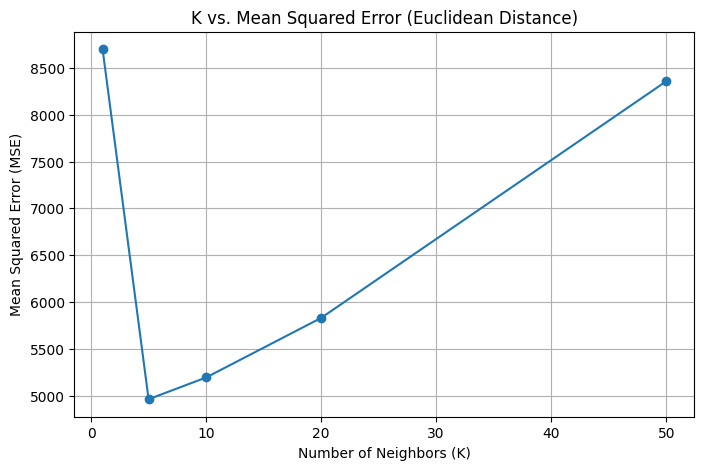


=== Bias-Variance Tradeoff Analysis ===
Small K (e.g., 1) → Low bias, high variance (overfitting).
Large K (e.g., 50) → High bias, low variance (underfitting).
Intermediate K values (e.g., 5–10) often balance bias and variance.


In [7]:
# KNN Regressor with Distance Metrics and K-Value Analysis
# =========================================================

# Step 1: Import required libraries
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Generate synthetic regression dataset
X, y = make_regression(n_samples=500, n_features=10, noise=15, random_state=42)

# Split into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Step 3a: Train KNN Regressor with Euclidean distance (K=5)
knn_euclidean = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test)
mse_euclidean = mean_squared_error(y_test, y_pred_euclidean)

# Step 3b: Train KNN Regressor with Manhattan distance (K=5)
knn_manhattan = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test)
mse_manhattan = mean_squared_error(y_test, y_pred_manhattan)

# Step 3c: Compare Mean Squared Errors
print("=== KNN Regressor Comparison (K=5) ===")
print(f"Euclidean Distance MSE: {mse_euclidean:.4f}")
print(f"Manhattan Distance MSE: {mse_manhattan:.4f}")

# Step 4: Analyze K values and Bias-Variance tradeoff
k_values = [1, 5, 10, 20, 50]
mse_scores = []

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Step 5: Plot K vs. MSE
plt.figure(figsize=(8, 5))
plt.plot(k_values, mse_scores, marker='o')
plt.title("K vs. Mean Squared Error (Euclidean Distance)")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid(True)
plt.show()

# Step 6: Interpretation
print("\n=== Bias-Variance Tradeoff Analysis ===")
print("Small K (e.g., 1) → Low bias, high variance (overfitting).")
print("Large K (e.g., 50) → High bias, low variance (underfitting).")
print("Intermediate K values (e.g., 5–10) often balance bias and variance.")


Question 10: KNN with KD-Tree/Ball Tree, Imputation, and Real-World
Data
Task:
1. Load the Pima Indians Diabetes dataset (contains missing values).
2. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values.
3. Train KNN using:
a. Brute-force method
b. KD-Tree
c. Ball Tree
4. Compare their training time and accuracy.
5. Plot the decision boundary for the best-performing method (use 2 most important
features).
Dataset: Pima Indians Diabetes

Dataset shape: (768, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

=== BRUTE Method ===
Accuracy: 0.7143
Training + Prediction Time: 0.0025 seconds

=== KD_TREE Method ===
Accuracy: 0.7143
Training + Prediction Time: 0.0051 seconds

=== BALL_TREE Method ===
Accuracy: 0.7143
Training + Prediction Time: 0.0035 seconds

=== KNN Comparison Table =

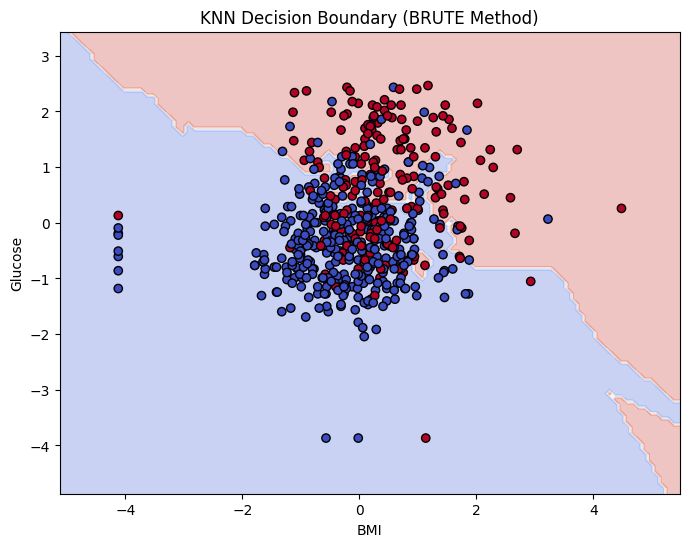

In [8]:
# ===============================================================
# Question 10: KNN with KD-Tree / Ball Tree, Imputation & Real Data
# Dataset: Pima Indians Diabetes
# ===============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import mutual_info_classif

# ---------------------------------------------------------------
# Step 1: Load the dataset (contains missing values)
# ---------------------------------------------------------------
url = "https://raw.githubusercontent.com/MasteriNeuron/datasets/refs/heads/main/diabetes.csv"
df = pd.read_csv(url)
print("Dataset shape:", df.shape)
print(df.head())

# ---------------------------------------------------------------
# Step 2: Handle missing values using KNN Imputer
# ---------------------------------------------------------------
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Split into features and target
X = df_imputed.drop("Outcome", axis=1)
y = df_imputed["Outcome"]

# ---------------------------------------------------------------
# Step 3: Train/Test Split & Scaling
# ---------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------------------------------------------------------
# Step 4: Train KNN with different algorithms (Brute, KDTree, BallTree)
# ---------------------------------------------------------------
methods = ['brute', 'kd_tree', 'ball_tree']
results = []

for method in methods:
    start_time = time.time()
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=method)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    end_time = time.time()

    acc = accuracy_score(y_test, y_pred)
    runtime = end_time - start_time
    results.append((method, acc, runtime))
    print(f"\n=== {method.upper()} Method ===")
    print(f"Accuracy: {acc:.4f}")
    print(f"Training + Prediction Time: {runtime:.4f} seconds")

# ---------------------------------------------------------------
# Step 5: Compare methods
# ---------------------------------------------------------------
results_df = pd.DataFrame(results, columns=["Algorithm", "Accuracy", "Time (s)"])
print("\n=== KNN Comparison Table ===")
print(results_df)

# Find the best-performing method
best_method = results_df.loc[results_df["Accuracy"].idxmax(), "Algorithm"]
print(f"\nBest Performing Method: {best_method.upper()}")

# ---------------------------------------------------------------
# Step 6: Identify the 2 most important features for visualization
# ---------------------------------------------------------------
mi_scores = mutual_info_classif(X, y, random_state=42)
top_features_idx = np.argsort(mi_scores)[-2:]
top_features = X.columns[top_features_idx]
print(f"\nTop 2 Important Features: {list(top_features)}")

# Prepare data for visualization
X_vis = X_train_scaled[:, top_features_idx]
y_vis = y_train

# Retrain the best KNN on 2 features only
knn_best = KNeighborsClassifier(n_neighbors=5, algorithm=best_method)
knn_best.fit(X_vis, y_vis)

# ---------------------------------------------------------------
# Step 7: Plot Decision Boundary
# ---------------------------------------------------------------
plt.figure(figsize=(8, 6))

# Create grid
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict grid points
Z = knn_best.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision regions
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, edgecolor='k', cmap='coolwarm')
plt.xlabel(top_features[0])
plt.ylabel(top_features[1])
plt.title(f"KNN Decision Boundary ({best_method.upper()} Method)")
plt.show()
